# Property Price Prediction

### Import required libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

### Load the data

In [78]:
train = pd.read_csv("Property_Price_Train.csv")
test = pd.read_csv("Property_Price_Test.csv")

In [79]:
# Remove Id and Sale_Price column from the train dataset
train = train.drop(['Id'], axis=1)

# Remove Id and Sale_Price column from the test dataset
test = test.drop(['Id'], axis=1)

In [80]:
alldata = train.append(test)

In [81]:
alldata = alldata.reset_index()

In [82]:
alldata.head()

,index,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,0,60,RLD,65.0,8450.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,20,RLD,80.0,9600.0,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,60,RLD,68.0,11250.0,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,70,RLD,60.0,9550.0,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,60,RLD,84.0,14260.0,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Dimensions of dataset

In [83]:
alldata.shape

(2918, 81)

### Checking datatypes

In [84]:
# check the datatype of variables
alldata.dtypes

index               int64
Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size          float64
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price        float64
Length: 81, dtype: object

In [85]:
alldata.describe()

,index,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,2918.00000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2895.000000,2917.000000,2917.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2916.000000,2916.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2759.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,1459.000000
mean,729.00000,57.150446,69.303454,10194.634957,6.089445,5.564428,1971.314942,1984.271076,102.236615,441.290024,49.499829,560.917724,1051.707576,1159.548663,336.599040,4.696025,1500.843729,0.429698,0.061385,1.568197,0.380055,2.860178,1.044551,6.451679,0.597327,1978.118159,1.766884,471.851510,93.095222,48.062908,24.411772,2.603153,16.067855,2.252570,50.843386,6.213160,2007.792666,180944.102810
std,421.24911,42.519354,23.349420,7888.702911,1.410045,1.113292,30.296408,20.894880,179.355169,455.632103,169.176028,439.548616,440.825601,392.425265,428.729653,46.404695,506.117484,0.524719,0.245726,0.552964,0.502827,0.822830,0.214497,1.569626,0.646145,25.577701,0.761623,213.846684,126.257764,68.167925,64.346881,25.192440,56.193208,35.670034,567.498680,2.715224,1.315184,79464.918335
min,0.00000,20.000000,21.000000,-4265.104479,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.25000,20.000000,59.000000,7134.500000,5.000000,5.000000,1953.250000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129950.000000
50%,729.00000,50.000000,68.000000,9600.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,477.000000,75.123594,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1093.75000,70.000000,80.000000,12342.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,806.000000,1302.000000,1387.750000,704.000000,0.000000,1743.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,593.481992,173.183207,86.733331,50.325034,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1458.00000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Summary of statistics pertaining to the DataFrame columns. This function gives the mean, std, minimum value, maximum value and IQR values and given summary about numeric columns

### Examine the numerical and categorical features in the dataset

In [86]:
df_numeric_features = alldata.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['index', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [87]:
df_categorical_features = alldata.select_dtypes(include=[np.object])

df_categorical_features.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

### Missing Values Analysis
Most libraries will give you an error if you try to build a model using data with missing values Python libraries represent missing numbers as nan which is short for "not a number". You can detect which cells have missing values, and then count how many there are in each column with the command

In [88]:
# check for missing values
missing = alldata.isnull().sum()
missing

index                0
Building_Class       0
Zoning_Class         4
Lot_Extent         486
Lot_Size             0
                  ... 
Month_Sold           0
Year_Sold            0
Sale_Type            1
Sale_Condition       0
Sale_Price        1459
Length: 81, dtype: int64

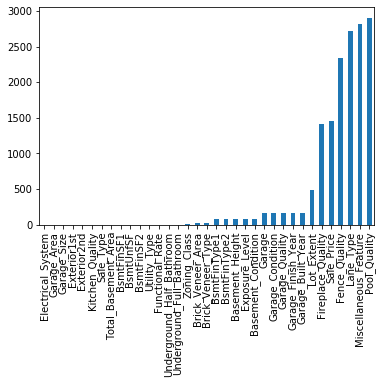

In [89]:
# check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]
# we can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

There are 35 attributes have missing values

### Missing value treatment for numerical features

In [90]:
# fill na with median
alldata.fillna(alldata.median(), inplace=True)

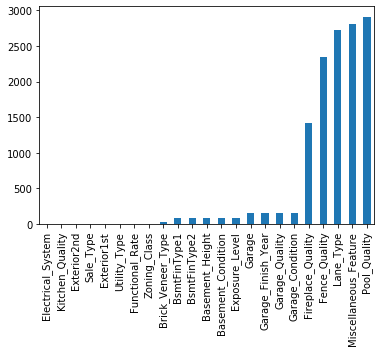

In [91]:
# Again check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]
# we can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()

We can only replace missing values by mean whose data type is numeric.
For a few columns there is lots of NaN entries.
However, reading the data description we find this is not missing data:
For Pool_Quality, NaN is not missing data but means no pool, likewise for Fence_Quality, Fireplace_Quality etc.

### Missing value treatment for categorical features

In [92]:
# Replace nan with None in these columns
cols_fillna = ['Pool_Quality','Miscellaneous_Feature','Lane_Type','Fence_Quality','Brick_Veneer_Type','Fireplace_Quality',
               'Garage_Quality','Garage_Condition', 'Electrical_System','Garage_Finish_Year', 
               'Exposure_Level','Basement_Condition','Basement_Height','BsmtFinType1','BsmtFinType2','Garage','Zoning_Class','Functional_Rate',
               'Utility_Type','Exterior1st','Sale_Type','Exterior2nd','Kitchen_Quality','Electrical_System']
for col in cols_fillna:
    alldata[col].fillna('None',inplace=True)

In [93]:
# Again check for missing values
alldata.isnull().sum()

index             0
Building_Class    0
Zoning_Class      0
Lot_Extent        0
Lot_Size          0
                 ..
Month_Sold        0
Year_Sold         0
Sale_Type         0
Sale_Condition    0
Sale_Price        0
Length: 81, dtype: int64

### Examine the numerical and categorical features in the dataset after missing value treatment

In [94]:
df_numeric_features = alldata.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['index', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [95]:
df_numeric_features.head()

,index,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,0,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500.0
1,1,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500.0
2,2,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500.0
3,3,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000.0
4,4,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000.0


In [96]:
df_categorical_features = alldata.select_dtypes(include=[np.object])

df_categorical_features.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [97]:
df_categorical_features.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RLD,Paved,None,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RLD,Paved,None,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,Gable,SS,MetalSd,MetalSd,None,TA,TA,CB,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TF,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RLD,Paved,None,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RLD,Paved,None,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,Gable,SS,Wd Sdng,Wd Shng,None,TA,TA,BT,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,TF,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RLD,Paved,None,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


### Scale our numeric variables using min-max normalization

In [98]:
# apply the min-max scaling to our numeric variables
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# Scaling down the numeric variables
df_housingdata_numcols = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:36]), columns = df_numeric_features.iloc[:,0:36].columns.tolist())

In [99]:
df_housingdata_numcols.head()

,index,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold
0,0.000000,0.235294,0.150685,0.057925,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.751321,0.284829,0.276324,0.157328,0.0,0.0,0.0,0.0,0.090909
1,0.000686,0.000000,0.202055,0.063164,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.201368,0.304755,0.281834,0.152826,0.0,0.0,0.0,0.0,0.363636
2,0.001372,0.235294,0.160959,0.070681,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.214817,0.206706,0.235952,0.100760,0.0,0.0,0.0,0.0,0.727273
3,0.002058,0.294118,0.133562,0.062936,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.510932,0.218522,0.244666,0.191815,0.0,0.0,0.0,0.0,0.090909
4,0.002743,0.235294,0.215753,0.084393,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.431707,0.185849,0.223759,0.158561,0.0,0.0,0.0,0.0,1.000000


### Perform one-hot encoding on categorical variables

In [100]:
for col in  df_categorical_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_categorical_features[col],prefix=col)
    df_categorical_features = pd.concat([df_categorical_features,one_hot_encoded_variables],axis=1)
    df_categorical_features.drop([col],axis=1, inplace=True)

### Concatenate the numeric and encoded variables to the dataframe

In [101]:
df_housedata = pd.concat([df_categorical_features,df_numeric_features], axis=1)
df_housedata.head()
df_housedata.columns
df_housedata.dtypes

Zoning_Class_Commer      uint8
Zoning_Class_FVR         uint8
Zoning_Class_None        uint8
Zoning_Class_RHD         uint8
Zoning_Class_RLD         uint8
                        ...   
Pool_Area                int64
Miscellaneous_Value      int64
Month_Sold               int64
Year_Sold                int64
Sale_Price             float64
Length: 321, dtype: object

### Create training and testing datasets using the train_test_split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
# create feature and response varibles
X=df_housedata.drop(labels='Sale_Price',axis=1)
Y = df_housedata ['Sale_Price']
X.dtypes
Y.head

<bound method NDFrame.head of 0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2913    163000.0
2914    163000.0
2915    163000.0
2916    163000.0
2917    163000.0
Name: Sale_Price, Length: 2918, dtype: float64>

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2042, 320) (876, 320) (2042,) (876,)


### Use SGDRegressor() to build a linear model

In [117]:
import numpy as np
from sklearn.linear_model import SGDRegressor
lin_model = SGDRegressor()
# we fit our model with train data
lin_model.fit(x_train, y_train)
# we use predict() to predict our values
lin_model_predictions = lin_model.predict(x_test)
# we check the coefficient of determination with score()
print(lin_model.score(x_test,y_test))

-1.3922746252538566e+24


coefficient of determination tells about the goodness of fit of a model

### Mean Square Error

In [118]:
# we check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lin_model_predictions)
rmse = np.sqrt(mse)
print(rmse)

6.8179740721481176e+16


In [119]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_model_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lin_model_predictions)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_model_predictions))

Mean Squared Error: 4.6484770448483985e+33
Root Mean Squared Error: 6.8179740721481176e+16
Mean Absolute Error: 4.791096942454324e+16


### Create a model with grid search

In [120]:
# ignore the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV

# Grid search - this will take about 1 minute.
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(lin_model, param_grid)
clf.fit(x_train, y_train)
print("Best score: " + str(clf.best_score_))

C:\Users\HP003384\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\HP003384\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best score: 0.28772510276621743


In [121]:
pred_test = clf.predict(x_test)

### Print best parameter values

In [122]:
print('Best C:',clf.best_estimator_.C) 
print('Best alpha:',clf.best_estimator_.alpha) 
print('Best n_iter_no_change:',clf.best_estimator_.n_iter_no_change)
print('Best tol:',clf.best_estimator_.tol) 
print('Best eta0:',clf.best_estimator_.eta0) 
print('Best learning rate:',clf.best_estimator_.learning_rate) 

Best C: 1.0
Best alpha: 0.01
Best n_iter_no_change: 5
Best tol: 0.001
Best eta0: 0.01
Best learning rate: invscaling


### Build a model using best parameters

In [123]:
linreg_SGD = SGDRegressor(loss='squared_loss', alpha=0.01, penalty='l2',eta0=0.01,learning_rate='invscaling',max_iter=1000)

### Training the model

In [124]:
linreg_SGD.fit(x_train,y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

### Predictions on test data

In [128]:
pred_test = linreg_SGD.predict(x_test)

In [160]:
linreg_SGD.score(x_train,y_train)

-7.60722204369341e+22

In [170]:
linreg_SGD.score(x_test,y_test)

-7.834776769363344e+22

### Mean Square Error

In [171]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))

Mean Squared Error: 2.6158474271738233e+32
Root Mean Squared Error: 1.61735816292305e+16
Mean Absolute Error: 1.2954854715419302e+16


In [172]:
df_Predicted = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
df_Predicted

,Actual,Predicted
620,67000.0,-1.766468e+16
874,66500.0,-1.667740e+16
1363,156932.0,-2.014094e+16
1289,281000.0,-2.847213e+16
90,109900.0,-6.467651e+15
...,...,...
936,184900.0,-1.320175e+16
679,128500.0,-1.305265e+16
1021,194000.0,-9.056368e+15
1813,163000.0,-1.491006e+16


In [173]:
import seaborn as sns

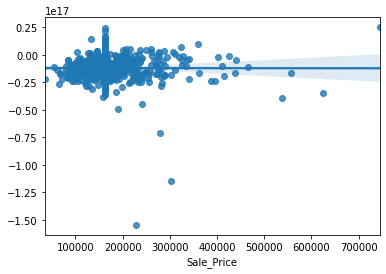

In [174]:
sns.regplot(y_test,pred_test)

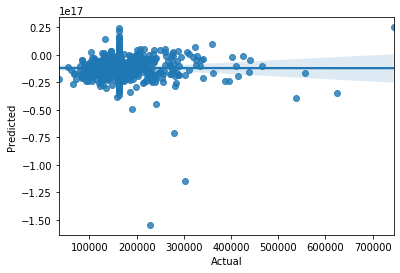

In [175]:
sns.regplot(x='Actual',y='Predicted',data=df_Predicted)

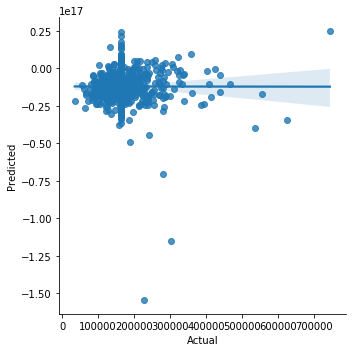

In [176]:
sns.lmplot(x='Actual',y='Predicted',data=df_Predicted)